In [1]:
from visual_transformer import *
from visual_transformer.enhanced_model import *

In [2]:
from game import *

game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings)

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


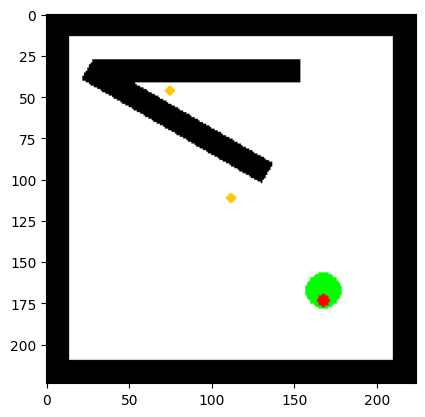

In [3]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [4]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [5]:
#device = torch.device('cuda:1') # let's use the alligator GPU
device = torch.device('cuda:0')

In [6]:
brain = EnhancedAgentBrain()
brain.move_to(device) # special function that wraps 'to'. Dumb? yes. Needed? Also yes.

EnhancedAgentBrain(
  (img_enc): ImageTransformerEncoder(
    (embed): Sequential(
      (0): PatchEmbedding(
        (linear_project): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (1): PositionalEncoding_2D()
      (2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (pe): PositionalEncoding_2D()
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (linear1): Linear(in_features=768, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=768, bias=True)
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          

In [7]:
inp_images = torch.randn(4, 3, 224, 224, device=device)

In [8]:
inp_texts = torch.randint(0, 1000, (4, 32), device=device)

In [9]:
inp_texts

tensor([[541,  14, 917, 533, 450, 462, 938, 868, 992, 810, 150, 297, 412, 952,
         895, 610, 922, 876, 715, 220, 660, 772, 544, 430, 246, 957, 976, 285,
         840, 502, 721, 681],
        [288, 819, 119, 850, 268, 921, 466, 716, 264, 854, 440, 319, 720, 971,
         356, 827, 912, 533, 445,  35, 247, 196, 543, 468, 940, 198, 377, 789,
         841, 244, 783, 362],
        [607, 639, 483, 900, 473, 587, 203, 203, 211, 544, 148, 142, 984,  28,
         272, 400, 473, 868, 930, 236, 876, 925, 233, 617, 482, 329, 838, 401,
         730, 355, 379, 398],
        [ 19, 790, 847, 965,   7, 577, 190, 684, 273, 496,  97, 396, 887, 428,
         347, 621, 420, 444, 773, 741, 541, 525, 574, 644, 519,  63, 762, 177,
         835, 353, 110, 481]], device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.483955..4.6374993].


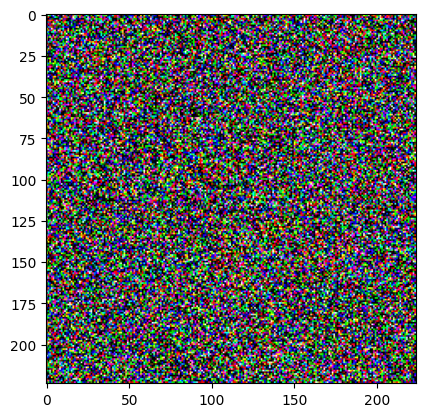

In [10]:
quick_display(inp_images[0])

In [11]:
probs, recon = brain(inp_texts, inp_images, ret_imgs=True)

/home/atbolsh/anaconda3/envs/llava-florence/lib/python3.12/site-packages/torch/_tensor.py:955: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [12]:
probs.size()

torch.Size([4, 10000, 32])

In [13]:
recon.size()

torch.Size([4, 3, 224, 224])

In [14]:
inp_encoding = brain.img_enc(inp_images)

In [15]:
inp_encoding.size()

torch.Size([4, 256, 768])

In [16]:
w = brain.img_weight(inp_encoding)

In [17]:
w.size()

torch.Size([4, 4, 1])

In [19]:
w.sum(1)

tensor([[1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SumBackward1>)

In [21]:
w

tensor([[[0.2377],
         [0.3077],
         [0.2013],
         [0.2533]],

        [[0.2695],
         [0.2879],
         [0.1789],
         [0.2637]],

        [[0.2426],
         [0.3101],
         [0.2919],
         [0.1554]],

        [[0.2518],
         [0.2141],
         [0.2569],
         [0.2772]]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [22]:
w[0].sum()

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [23]:
# seems roughly correct; will delete this before merging.